In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from google.colab import drive

# Read a sample of the dataset

df = pd.read_csv('/content/drive/MyDrive/All Lending Club/Loan_status_2007-2020Q3.gzip')
# Display basic information about the DataFrame
print(df.info())

# Show the value counts of 'loan_status'
print(df['loan_status'].value_counts(dropna=False))


<ipython-input-2-b23fb68f8480>:6: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/All Lending Club/Loan_status_2007-2020Q3.gzip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Columns: 142 entries, Unnamed: 0 to debt_settlement_flag
dtypes: float64(106), int64(1), object(35)
memory usage: 3.1+ GB
None
loan_status
Fully Paid                                             1497783
Current                                                1031016
Charged Off                                             362548
Late (31-120 days)                                       16154
In Grace Period                                          10028
Late (16-30 days)                                         2719
Issued                                                    2062
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                    433
NaN                                                          1
Name: count, dtype: int64


**Remove features with more than 50% missing values**

In [ ]:
# Calculate missing value percentages
missing_percentages = df.isnull().mean() * 100

for column, missing_percentage in missing_percentages.items():
    print(f"{column} --> {df[column].isnull().sum()} missing values ({missing_percentage:.2f}%)")

# Identify columns with more than 50% missing values
columns_to_drop = missing_percentages[missing_percentages > 50].index.tolist()

# Remove columns with more than 50% missing values
df = df.drop(columns=columns_to_drop)

# Display the filtered DataFrame
print("\n\nDataFrame after removing columns with more than 50% missing values:")
print(df.head())

Unnamed: 0 --> 0 missing values (0.00%)
id --> 0 missing values (0.00%)
loan_amnt --> 1 missing values (0.00%)
funded_amnt --> 1 missing values (0.00%)
funded_amnt_inv --> 1 missing values (0.00%)
term --> 1 missing values (0.00%)
int_rate --> 1 missing values (0.00%)
installment --> 1 missing values (0.00%)
grade --> 1 missing values (0.00%)
sub_grade --> 1 missing values (0.00%)
emp_title --> 264087 missing values (9.03%)
emp_length --> 205221 missing values (7.01%)
home_ownership --> 1 missing values (0.00%)
annual_inc --> 5 missing values (0.00%)
verification_status --> 1 missing values (0.00%)
issue_d --> 1 missing values (0.00%)
loan_status --> 1 missing values (0.00%)
pymnt_plan --> 1 missing values (0.00%)
url --> 1 missing values (0.00%)
purpose --> 1 missing values (0.00%)
title --> 23327 missing values (0.80%)
zip_code --> 2 missing values (0.00%)
addr_state --> 1 missing values (0.00%)
dti --> 3109 missing values (0.11%)
delinq_2yrs --> 30 missing values (0.00%)
earliest_cr

In [ ]:
pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 731.7 kB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from skfeature.function.similarity_based import fisher_score
import numpy as np
import pandas as pd

X = df.drop(columns=['loan_status'])
y = df['loan_status']


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X.drop('id', axis=1, inplace=True)
X.drop('Unnamed: 0', axis=1, inplace=True)
X.drop('url', axis=1, inplace=True)
X.drop('zip_code', axis=1, inplace=True)
X.drop('addr_state', axis=1, inplace=True)
X.drop('emp_title', axis=1, inplace=True)
X.drop('title', axis=1, inplace=True)

X['term'].fillna('', inplace=True)


def extract_numeric(term):
    if isinstance(term, str):
        term = term.strip()
        if term.endswith(' months'):
            term = term[:-len(' months')]
        numeric_part = ''.join(filter(str.isdigit, term))
        if numeric_part:
            return int(numeric_part)
    return None


X['term'] = X['term'].apply(extract_numeric)

def remove_percentage(value):
    if isinstance(value, str) and value.endswith('%'):
        return float(value[:-1])
    else:
        return None


X['revol_util'] = X['revol_util'].apply(remove_percentage)
X['int_rate'] = X['int_rate'].apply(remove_percentage)



date_format = '%b-%Y'  # Example format: Month ( Jan) - Year ( 2015)

# Convert date features to datetime format
X['last_credit_pull_d'] = pd.to_datetime(X['last_credit_pull_d'], format=date_format)
X['last_pymnt_d'] = pd.to_datetime(X['last_pymnt_d'], format=date_format)
X['issue_d'] = pd.to_datetime(X['issue_d'], format=date_format)
X['earliest_cr_line'] = pd.to_datetime(X['earliest_cr_line'], format=date_format)


emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0.5,
    ' ': 0
}

# Apply the mapping to convert emp_length to numerical values
X['emp_length'] = X['emp_length'].map(emp_length_mapping)



ordinal_features = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'application_type', 'hardship_flag','debt_settlement_flag']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to ordinal categorical features
for feature in ordinal_features:
    X[feature] = label_encoder.fit_transform(X[feature])




# Function to convert non-datetime features to integer
def convert_to_integer(value):
    try:
        return int(value)  # Try converting to integer directly
    except (ValueError, TypeError):
        return None  # Return None for non-convertible values

# Identify datetime columns (timestamp columns)
datetime_columns = [col for col in X.columns if pd.api.types.is_datetime64_any_dtype(X[col])]

# Apply conversion function to non-datetime columns
for column in X.columns:
    if column not in datetime_columns:
        X[column] = X[column].apply(convert_to_integer)

# Use LabelEncoder for categorical features (e.g., feature2)
label_encoder = LabelEncoder()
for column in X.columns:
    if column not in datetime_columns and X[column].dtype == 'object':
        X[column] = label_encoder.fit_transform(X[column])




datetime_columns = ['last_credit_pull_d', 'last_pymnt_d', 'issue_d', 'earliest_cr_line']

reference_date = pd.Timestamp('2024-04-22')

for col in datetime_columns:
    X[col] = (reference_date - X[col]).dt.days
X.fillna(X.mean(), inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 13.5 MB/s eta 0:00:00


In [ ]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.3 MB/s eta 0:00:00


In [ ]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


## **Fisher Score**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split


# Step 3: Implement Fisher Score feature selection technique
def fisher_score(X, y):
    n_classes = len(np.unique(y))
    n_features = X.shape[1]

    # Initialize arrays to hold class means and overall mean
    class_means = np.zeros((n_classes, n_features))
    overall_mean = np.mean(X, axis=0)

    # Compute class means
    for i, cls in enumerate(np.unique(y)):
        class_means[i, :] = np.mean(X[y == cls], axis=0)

    # Initialize arrays to hold between-class variance and within-class variance
    between_class_variance = np.zeros(n_features)
    within_class_variance = np.zeros(n_features)

    # Compute between-class variance and within-class variance
    for i, cls in enumerate(np.unique(y)):
        n_cls = np.sum(y == cls)
        between_class_variance += n_cls * (class_means[i, :] - overall_mean) ** 2
        within_class_variance += np.sum((X[y == cls] - class_means[i, :]) ** 2, axis=0)

    # Compute Fisher Scores
    fisher_scores = between_class_variance / within_class_variance
    return fisher_scores

# Step 4: Compute Fisher Scores
fisher_scores = fisher_score(X.values, y)

# Step 5: Create a DataFrame to store feature names and their corresponding Fisher Scores
feature_importance = pd.DataFrame(data={'Feature': X.columns, 'FisherScore': fisher_scores})

# Step 6: Sort the features based on their Fisher Scores
feature_importance = feature_importance.sort_values(by='FisherScore', ascending=False)

# Step 7: Print all features with their Fisher Scores
print("Feature Importance (Fisher Score):")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}, Fisher Score: {row['FisherScore']:.4f}")

Feature Importance (Fisher Score):
Feature: pymnt_plan, Fisher Score: inf
Feature: out_prncp, Fisher Score: 1.0445
Feature: out_prncp_inv, Fisher Score: 1.0442
Feature: issue_d, Fisher Score: 0.8011
Feature: last_pymnt_d, Fisher Score: 0.8002
Feature: last_fico_range_high, Fisher Score: 0.6112
Feature: last_fico_range_low, Fisher Score: 0.4655
Feature: recoveries, Fisher Score: 0.3998
Feature: total_rec_prncp, Fisher Score: 0.3629
Feature: collection_recovery_fee, Fisher Score: 0.3623
Feature: last_pymnt_amnt, Fisher Score: 0.3015
Feature: last_credit_pull_d, Fisher Score: 0.2694
Feature: total_pymnt, Fisher Score: 0.2042
Feature: total_pymnt_inv, Fisher Score: 0.2036
Feature: debt_settlement_flag, Fisher Score: 0.1428
Feature: hardship_flag, Fisher Score: 0.0941
Feature: sub_grade, Fisher Score: 0.0742
Feature: grade, Fisher Score: 0.0722
Feature: int_rate, Fisher Score: 0.0450
Feature: term, Fisher Score: 0.0347
Feature: application_type, Fisher Score: 0.0330
Feature: verification_st

<ipython-input-8-57db0f344646>:32: RuntimeWarning: divide by zero encountered in divide
  fisher_scores = between_class_variance / within_class_variance
<ipython-input-8-57db0f344646>:32: RuntimeWarning: invalid value encountered in divide
  fisher_scores = between_class_variance / within_class_variance


<ipython-input-9-70acc9860d85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance['Feature'], y=feature_importance['FisherScore'], palette=palette)


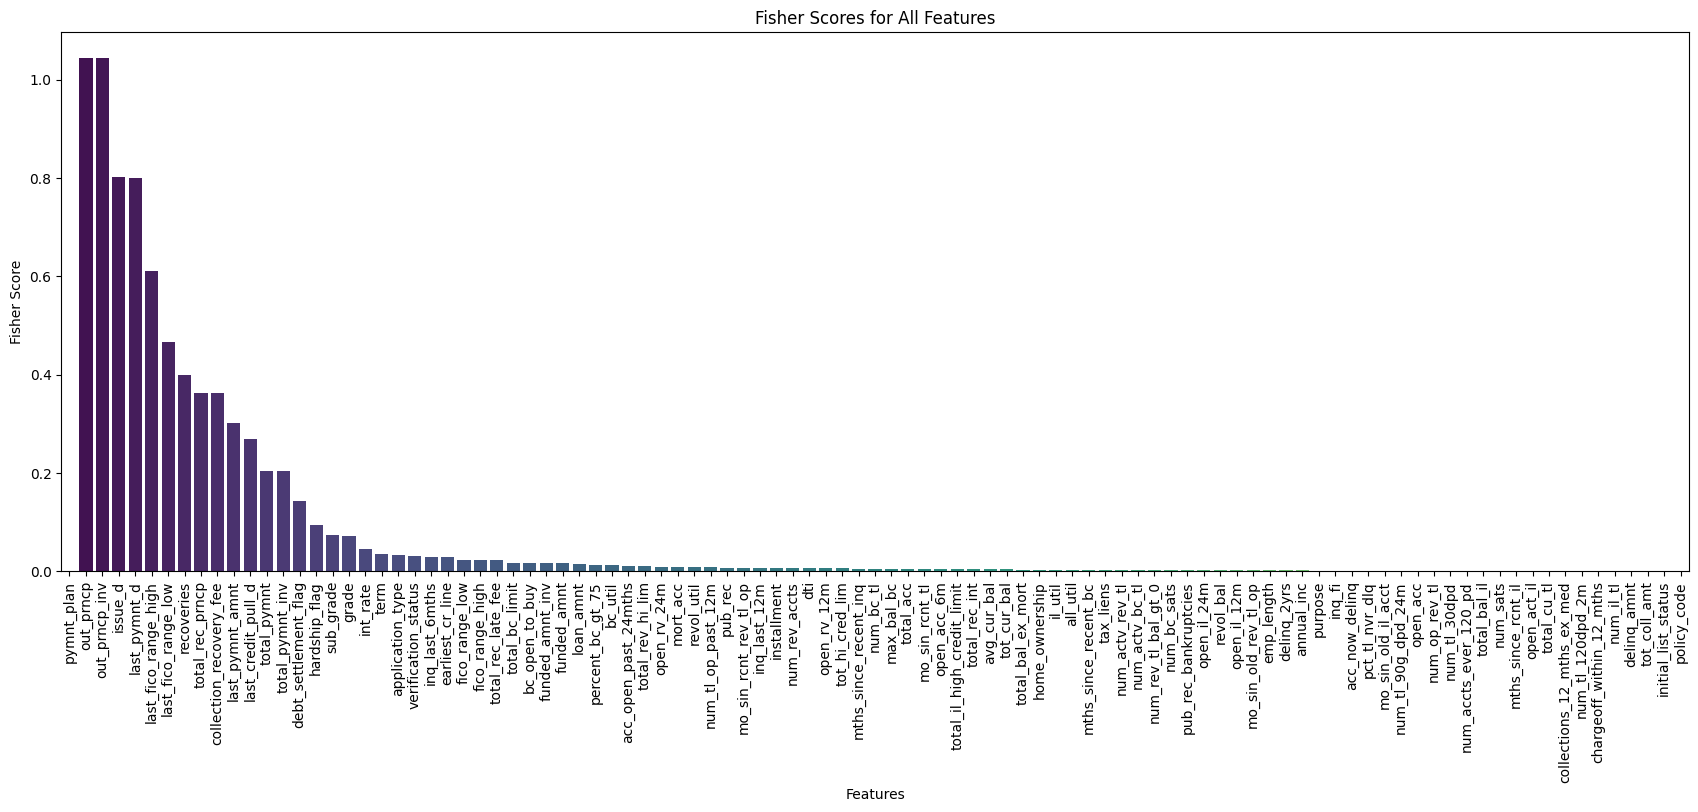

In [ ]:
plt.figure(figsize=(21, 7))
palette = sns.color_palette("viridis", len(feature_importance))
sns.barplot(x=feature_importance['Feature'], y=feature_importance['FisherScore'], palette=palette)
plt.xlabel('Features')
plt.ylabel('Fisher Score')
plt.title('Fisher Scores for All Features')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Step 9: Select features with Fisher Score greater than a threshold
selected_features = feature_importance[feature_importance['FisherScore'] > 0.015]['Feature']

# Step 10: Subset the feature matrix with selected features
X = X[selected_features]

# Step 11: Split the data into train and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340394 entries, 1966754 to 2219110
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   pymnt_plan               float64
 1   out_prncp                float64
 2   out_prncp_inv            float64
 3   issue_d                  float64
 4   last_pymnt_d             float64
 5   last_fico_range_high     float64
 6   last_fico_range_low      float64
 7   recoveries               float64
 8   total_rec_prncp          float64
 9   collection_recovery_fee  float64
 10  last_pymnt_amnt          float64
 11  last_credit_pull_d       float64
 12  total_pymnt              float64
 13  total_pymnt_inv          float64
 14  debt_settlement_flag     float64
 15  hardship_flag            float64
 16  sub_grade                float64
 17  grade                    float64
 18  int_rate                 float64
 19  term                     float64
 20  application_type         float64
 21  ve

## **All Model**

XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)


# Results for XGBoost
print("Model: XGBoost")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Classification Report:\n{report_xgb}\n")


y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

sorted_indices = np.argsort(y_prob_xgb)[::-1]
y_test_sorted = y_test[sorted_indices]
y_prob_sorted = y_prob_xgb[sorted_indices]

# Calculate cumulative proportion of positive examples (Cumulative Gain)
cumulative_positives = np.cumsum(y_test_sorted)

# Calculate cumulative proportion of all examples (Cumulative Lift)
cumulative_total = np.arange(1, len(y_test_sorted) + 1)

# Calculate Gini index based on Lorenz curve (normalized)
gini_index = 1 - (2 * np.sum(cumulative_positives) / np.sum(y_test_sorted)) / len(y_test_sorted)

print("Estimated Gini Index:", gini_index)

# Calculate precision, recall (sensitivity), and specificity
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

# Calculate H-Measure
h_measure_xgb = 2 * precision_xgb * recall_xgb / (precision_xgb + recall_xgb)
print("H-Measure:", h_measure_xgb)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate sensitivity (true positive rate)
sensitivity_xgb = recall_xgb
print("Sensitivity (TPR):", sensitivity_xgb)

# Calculate specificity (True Negative Rate)
tn = conf_matrix_xgb[0, 0]
fp = np.sum(conf_matrix_xgb[0, 1:])
specificity_xgb = tn / (tn + fp)
print("Specificity (TNR):", specificity_xgb)


# Calculate G-mean (Geometric mean of sensitivity and specificity)
g_mean_xgb = np.sqrt(sensitivity_xgb * specificity_xgb)
print("G-mean:", g_mean_xgb)


Model: XGBoost
Accuracy: 0.9911
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72588
           1       0.99      0.99      0.99    206215
           2       0.90      0.30      0.45        89
           3       0.98      0.84      0.91       148
           4       0.97      0.86      0.91       376
           5       0.99      1.00      1.00    299596
           6       0.57      0.32      0.41      1943
           7       0.94      0.97      0.95       377
           8       0.33      0.02      0.05       530
           9       0.89      0.81      0.85      3237

    accuracy                           0.99    585099
   macro avg       0.86      0.71      0.75    585099
weighted avg       0.99      0.99      0.99    585099


Accuracy: 0.9910903966679143
Estimated Gini Index: 0.1312279282052694
H-Measure: 0.9904756305111151
Sensitivity (TPR): 0.9910903966679143
Specificity (TNR): 0.9980988593155894
G-mean: 0

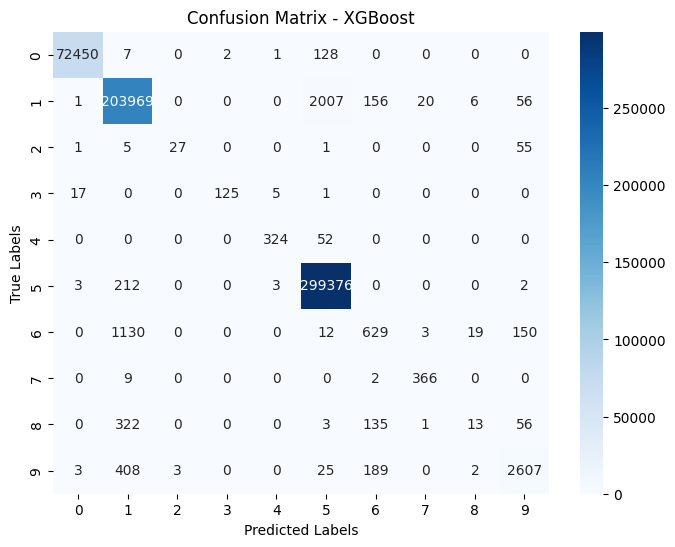

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

rf_model = RandomForestClassifier(n_estimators=40, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Accuracy:", accuracy)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

sorted_indices = np.argsort(y_prob_rf)[::-1]
y_test_sorted = y_test[sorted_indices]
y_prob_sorted = y_prob_rf[sorted_indices]

# Calculate cumulative proportion of positive examples (Cumulative Gain)
cumulative_positives = np.cumsum(y_test_sorted)

# Calculate cumulative proportion of all examples (Cumulative Lift)
cumulative_total = np.arange(1, len(y_test_sorted) + 1)

# Calculate Gini index based on Lorenz curve (normalized)
gini_index = 1 - (2 * np.sum(cumulative_positives) / np.sum(y_test_sorted)) / len(y_test_sorted)

print("Estimated Gini Index:", gini_index)

# Calculate precision, recall (sensitivity), and specificity
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

# Calculate H-Measure
h_measure_rf = 2 * precision_rf * recall_rf / (precision_rf + recall_rf)
print("H-Measure:", h_measure_rf)

# Calculate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_rf)

# Calculate sensitivity (true positive rate)
sensitivity_rf = recall_rf
print("Sensitivity (TPR):", sensitivity_rf)

# Calculate specificity (True Negative Rate)
tn = conf_matrix_xgb[0, 0]
fp = np.sum(conf_matrix_xgb[0, 1:])
specificity_rf = tn / (tn + fp)
print("Specificity (TNR):", specificity_rf)


# Calculate G-mean (Geometric mean of sensitivity and specificity)
g_mean_rf = np.sqrt(sensitivity_rf * specificity_rf)
print("G-mean:", g_mean_rf)

Accuracy: 0.9902768591298224
Estimated Gini Index: 0.22436662414054442
H-Measure: 0.9896240766694676
Sensitivity (TPR): 0.9902768591298224
Specificity (TNR): 0.9937592990576954
G-mean: 0.992016550971761


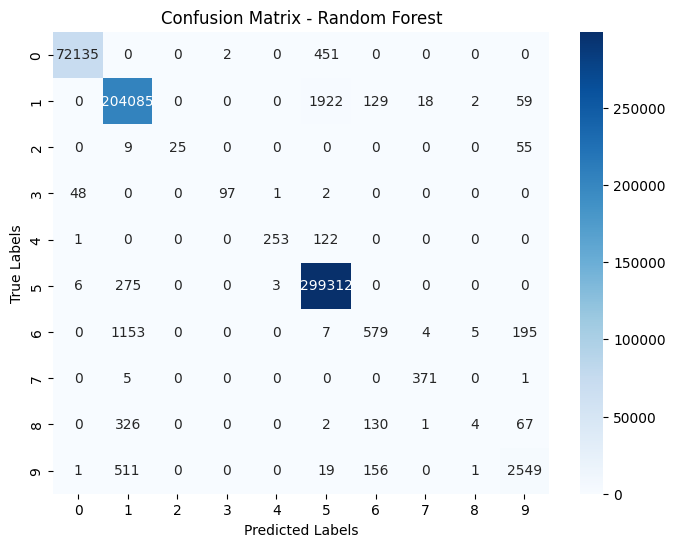

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# 1. Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# 2. Generate Predictions
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
y_pred_lr = lr_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Calculate sensitivity (True Positive Rate)
tp_lr = conf_matrix_lr[1, 1]  # True positives
fn_lr = conf_matrix_lr[1, 0]  # False negatives
sensitivity_lr = tp_lr / (tp_lr + fn_lr)

# Calculate specificity (True Negative Rate)
tn_lr = conf_matrix_lr[0, 0]  # True negatives
fp_lr = conf_matrix_lr[0, 1]  # False positives
specificity_lr = tn_lr / (tn_lr + fp_lr)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_lr = (sensitivity_lr * specificity_lr) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_lr = tp_lr / (tp_lr + fp_lr)
recall_lr = tp_lr / (tp_lr + fn_lr)
h_measure_lr = 2 * precision_lr * recall_lr / (precision_lr + recall_lr)


# 4. Print Metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Sensitivity (TPR): {sensitivity_lr:.4f}")
print(f"Specificity (TNR): {specificity_lr:.4f}")
print(f"G-mean: {g_mean_lr:.4f}")
print(f"H-measure: {h_measure_lr:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.9831
Sensitivity (TPR): 0.9999
Specificity (TNR): 0.9998
G-mean: 0.9999
H-measure: 0.9999
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     72588
           1       0.98      0.99      0.98    206215
           2       0.14      0.01      0.02        89
           3       0.24      0.22      0.23       148
           4       0.41      0.36      0.39       376
           5       0.99      1.00      0.99    299596
           6       0.21      0.00      0.00      1943
           7       0.97      0.72      0.83       377
           8       0.00      0.00      0.00       530
           9       0.80      0.28      0.41      3237

    accuracy                           0.98    585099
   macro avg       0.57      0.46      0.48    585099
weighted avg       0.98      0.98      0.98    585099



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


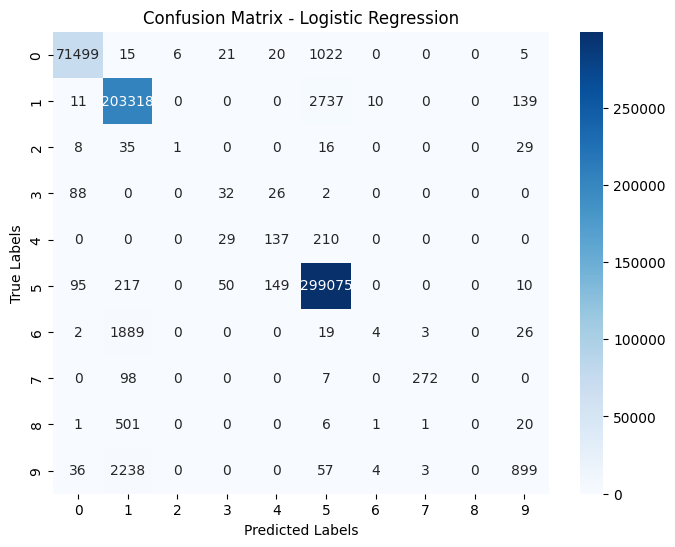

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train Naive Bayes Model (Gaussian Naive Bayes)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# 2. Generate Predictions
y_pred_nb = nb_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Calculate sensitivity (True Positive Rate)
tp_nb = conf_matrix_nb[1, 1]  # True positives
fn_nb = conf_matrix_nb[1, 0]  # False negatives
sensitivity_nb = tp_nb / (tp_nb + fn_nb)

# Calculate specificity (True Negative Rate)
tn_nb = conf_matrix_nb[0, 0]  # True negatives
fp_nb = conf_matrix_nb[0, 1]  # False positives
specificity_nb = tn_nb / (tn_nb + fp_nb)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_nb = (sensitivity_nb * specificity_nb) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_nb = tp_nb / (tp_nb + fp_nb)
recall_nb = tp_nb / (tp_nb + fn_nb)
h_measure_nb = 2 * precision_nb * recall_nb / (precision_nb + recall_nb)

# 4. Print Metrics
print("Naive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Sensitivity (TPR): {sensitivity_nb:.4f}")
print(f"Specificity (TNR): {specificity_nb:.4f}")
print(f"G-mean: {g_mean_nb:.4f}")
print(f"H-measure: {h_measure_nb:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Metrics:
Accuracy: 0.9161
Sensitivity (TPR): 1.0000
Specificity (TNR): 0.9998
G-mean: 0.9999
H-measure: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85     72588
           1       0.98      0.92      0.95    206215
           2       0.01      0.28      0.03        89
           3       0.08      0.64      0.15       148
           4       0.05      1.00      0.09       376
           5       0.94      0.96      0.95    299596
           6       0.07      0.20      0.11      1943
           7       0.04      1.00      0.08       377
           8       0.02      0.02      0.02       530
           9       0.37      0.54      0.44      3237

    accuracy                           0.92    585099
   macro avg       0.36      0.63      0.37    585099
weighted avg       0.95      0.92      0.93    585099



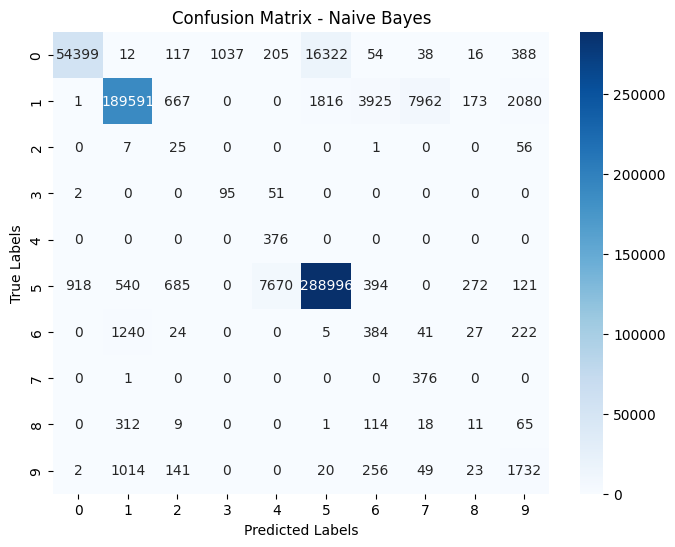

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Generate Predictions
y_pred_dt = dt_model.predict(X_test)  # Predicted labels

# 3. Calculate Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Calculate sensitivity (True Positive Rate)
tp_dt = conf_matrix_dt[1, 1]  # True positives
fn_dt = conf_matrix_dt[1, 0]  # False negatives
sensitivity_dt = tp_dt / (tp_dt + fn_dt)

# Calculate specificity (True Negative Rate)
tn_dt = conf_matrix_dt[0, 0]  # True negatives
fp_dt = conf_matrix_dt[0, 1]  # False positives
specificity_dt = tn_dt / (tn_dt + fp_dt)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean_dt = (sensitivity_dt * specificity_dt) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision_dt = tp_dt / (tp_dt + fp_dt)
recall_dt = tp_dt / (tp_dt + fn_dt)
h_measure_dt = 2 * precision_dt * recall_dt / (precision_dt + recall_dt)

# 4. Print Metrics
print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Sensitivity (TPR): {sensitivity_dt:.4f}")
print(f"Specificity (TNR): {specificity_dt:.4f}")
print(f"G-mean: {g_mean_dt:.4f}")
print(f"H-measure: {h_measure_dt:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Metrics:
Accuracy: 0.9849
Sensitivity (TPR): 1.0000
Specificity (TNR): 0.9999
G-mean: 0.9999
H-measure: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     72588
           1       0.98      0.98      0.98    206215
           2       0.35      0.35      0.35        89
           3       0.88      0.82      0.85       148
           4       0.79      0.78      0.78       376
           5       0.99      0.99      0.99    299596
           6       0.24      0.28      0.26      1943
           7       0.95      0.95      0.95       377
           8       0.07      0.08      0.08       530
           9       0.75      0.77      0.76      3237

    accuracy                           0.98    585099
   macro avg       0.70      0.70      0.70    585099
weighted avg       0.99      0.98      0.99    585099



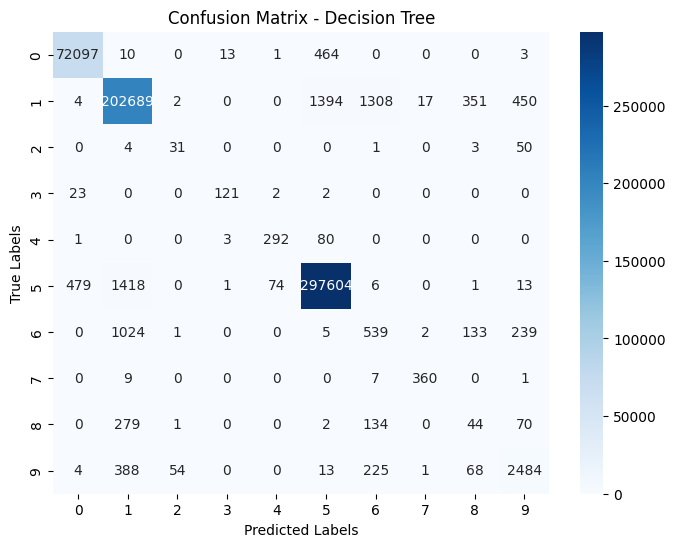

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

CatBoost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the CatBoost model with default hyperparameters
catboost_model = CatBoostClassifier()

# Fit CatBoost to the training data
catboost_model.fit(X_train, y_train)

# Generate predictions
y_pred_catboost = catboost_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_catboost)
conf_matrix = confusion_matrix(y_test, y_pred_catboost)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Calculate Gini index
gini_index = 2 * (accuracy * (1 - accuracy))

# Print evaluation metrics
print("CatBoost Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")
print(f"Gini Index: {gini_index:.4f}")

Learning rate set to 0.117532
0:	learn: 1.3827489	total: 1.21s	remaining: 20m 12s
1:	learn: 1.0856792	total: 2.13s	remaining: 17m 45s
2:	learn: 0.8871325	total: 3.07s	remaining: 17m 1s
3:	learn: 0.7458058	total: 3.96s	remaining: 16m 27s
4:	learn: 0.6388164	total: 4.84s	remaining: 16m 3s
5:	learn: 0.5546415	total: 5.72s	remaining: 15m 48s
6:	learn: 0.4858244	total: 6.61s	remaining: 15m 37s
7:	learn: 0.4288366	total: 7.49s	remaining: 15m 28s
8:	learn: 0.3818332	total: 8.37s	remaining: 15m 21s
9:	learn: 0.3401407	total: 9.24s	remaining: 15m 15s
10:	learn: 0.3046894	total: 10.1s	remaining: 15m 8s
11:	learn: 0.2753022	total: 11s	remaining: 15m 4s
12:	learn: 0.2476742	total: 11.9s	remaining: 15m
13:	learn: 0.2257250	total: 12.7s	remaining: 14m 57s
14:	learn: 0.2067215	total: 13.6s	remaining: 14m 54s
15:	learn: 0.1901704	total: 14.5s	remaining: 14m 53s
16:	learn: 0.1761183	total: 15.4s	remaining: 14m 51s
17:	learn: 0.1620405	total: 16.3s	remaining: 14m 49s
18:	learn: 0.1498018	total: 17.2s	re

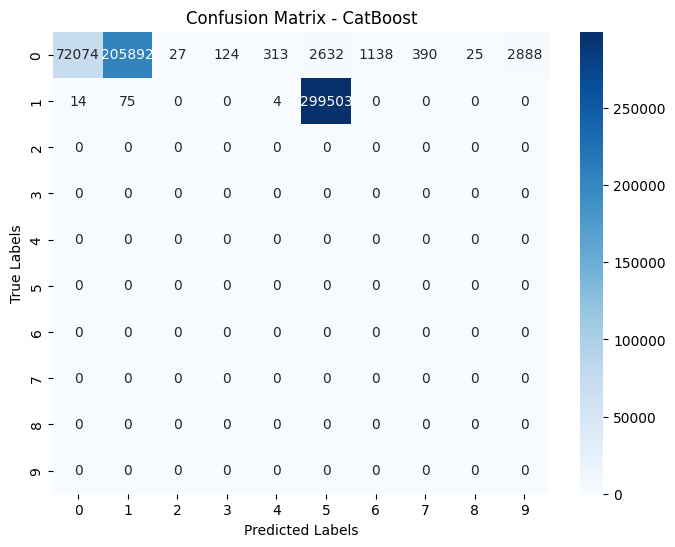

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_catboost)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - CatBoost')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

num_features = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Define the DNN model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(num_features,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_classes)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Calculate sensitivity (True Positive Rate)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)

# Calculate specificity (True Negative Rate)
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
specificity = tn / (tn + fp)

# Calculate G-mean (Geometric Mean of Sensitivity and Specificity)
g_mean = (sensitivity * specificity) ** 0.5

# Calculate H-measure (Harmonic Mean of Precision and Recall)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
h_measure = 2 * precision * recall / (precision + recall)

# Print evaluation metrics
print("Deep Neural Network Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (TPR): {sensitivity:.4f}")
print(f"Specificity (TNR): {specificity:.4f}")
print(f"G-mean: {g_mean:.4f}")
print(f"H-measure: {h_measure:.4f}")

Epoch 1/10
14628/14628 [==============================] - 39s 3ms/step - loss: 0.0824 - accuracy: 0.9785 - val_loss: 0.0483 - val_accuracy: 0.9874
Epoch 2/10
14628/14628 [==============================] - 37s 3ms/step - loss: 0.0497 - accuracy: 0.9869 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 3/10
14628/14628 [==============================] - 37s 3ms/step - loss: 0.0456 - accuracy: 0.9877 - val_loss: 0.0411 - val_accuracy: 0.9886
Epoch 4/10
14628/14628 [==============================] - 37s 3ms/step - loss: 0.0435 - accuracy: 0.9880 - val_loss: 0.0415 - val_accuracy: 0.9886
Epoch 5/10
14628/14628 [==============================] - 38s 3ms/step - loss: 0.0426 - accuracy: 0.9882 - val_loss: 0.0373 - val_accuracy: 0.9889
Epoch 6/10
14628/14628 [==============================] - 38s 3ms/step - loss: 0.0416 - accuracy: 0.9884 - val_loss: 0.0422 - val_accuracy: 0.9883
Epoch 7/10
14628/14628 [==============================] - 38s 3ms/step - loss: 0.0410 - accuracy: 0.9885 - val_loss: 0

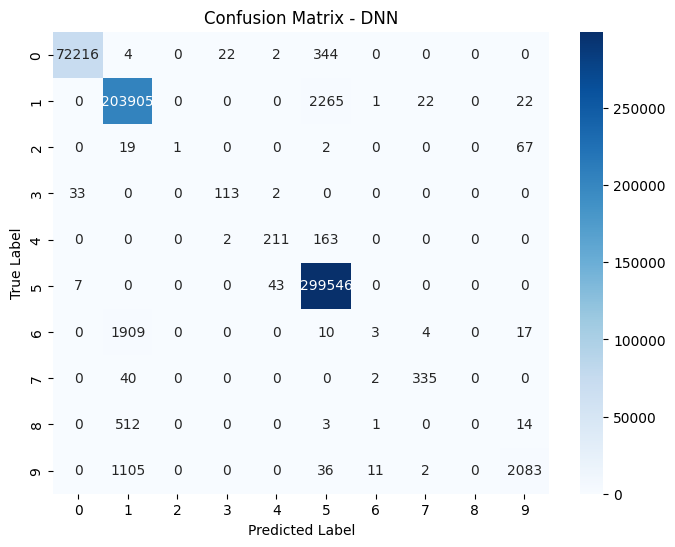

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_classes = np.argmax(y_pred, axis=1)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - DNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

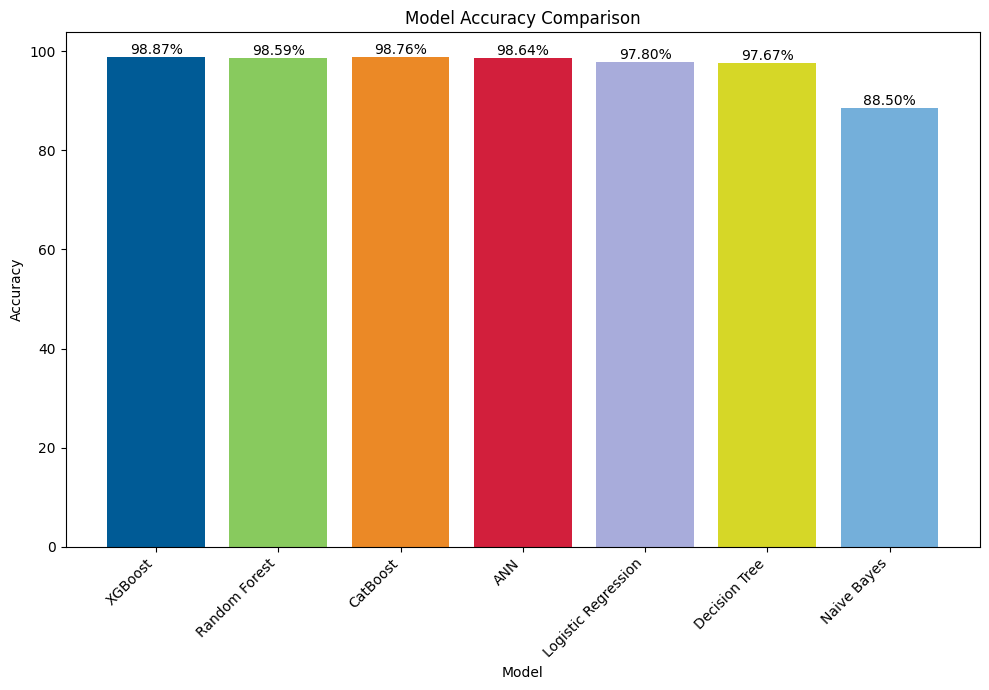

In [ ]:
import matplotlib.pyplot as plt

model_names = ['XGBoost', 'Random Forest', 'CatBoost', 'ANN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes' ]
accuracy_scores = [98.87, 98.59, 98.76, 98.64, 97.80, 97.67, 88.50 ]

colors = ['#005b96', '#88ca5e', '#eb8926', '#d21f3c', '#a8acdb', '#d6d727', '#74afda']

plt.figure(figsize=(10, 7))
bars = plt.bar(model_names, accuracy_scores, color=colors)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')

for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## XAI

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.1 MB/s eta 0:00:00


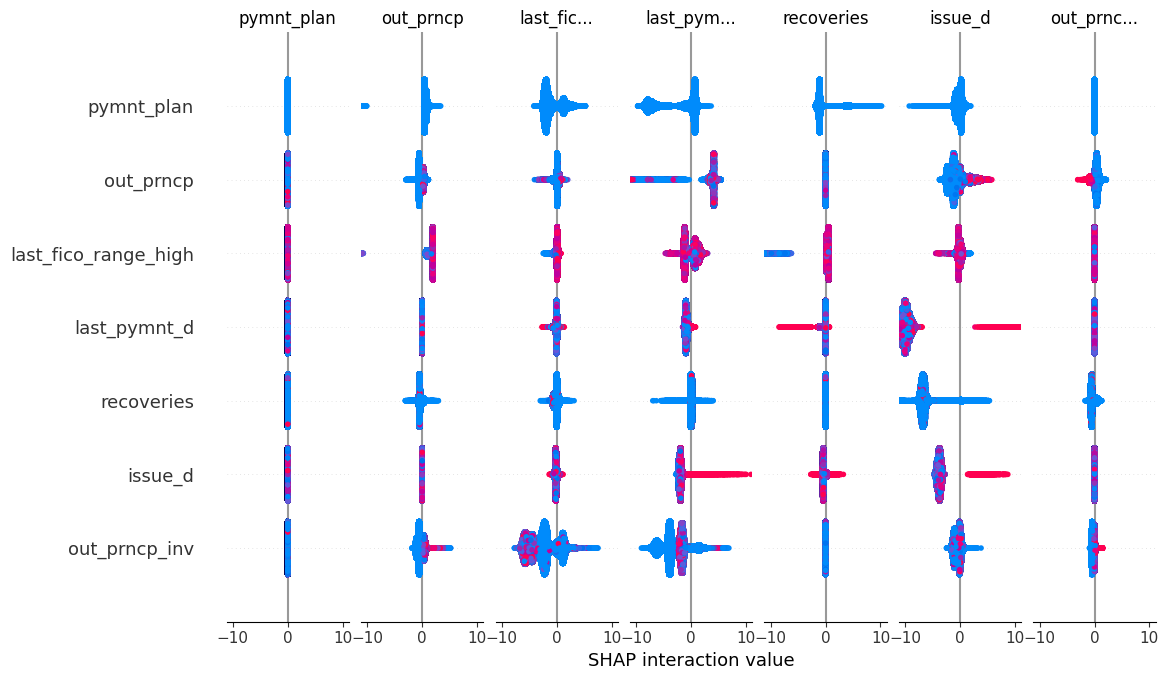

In [ ]:
import shap

explainer_xgb = shap.TreeExplainer(xgb_model)

shap_values_xgb = explainer_xgb.shap_values(X_test)

shap.summary_plot(shap_values_xgb, X_test, max_display=None)


In [ ]:
pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.8/778.8 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.5/247.5 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behav

In [ ]:
from interpret import show
from interpret.blackbox import MorrisSensitivity
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from interpret import show
from interpret.blackbox import MorrisSensitivity

# Determine the class with the highest frequency
unique_classes, class_counts = np.unique(y, return_counts=True)
highest_class = unique_classes[np.argmax(class_counts)]

# Create a binary target variable where the highest class is mapped to 1 and all other classes are mapped to 0
y = np.where(y == highest_class, 1, 0)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model on the binary classification data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Apply Morris Sensitivity explanation on the binary classification problem
msa = MorrisSensitivity(xgb_model, X_test)

# Show the global explanation
show(msa.explain_global())

SHAP

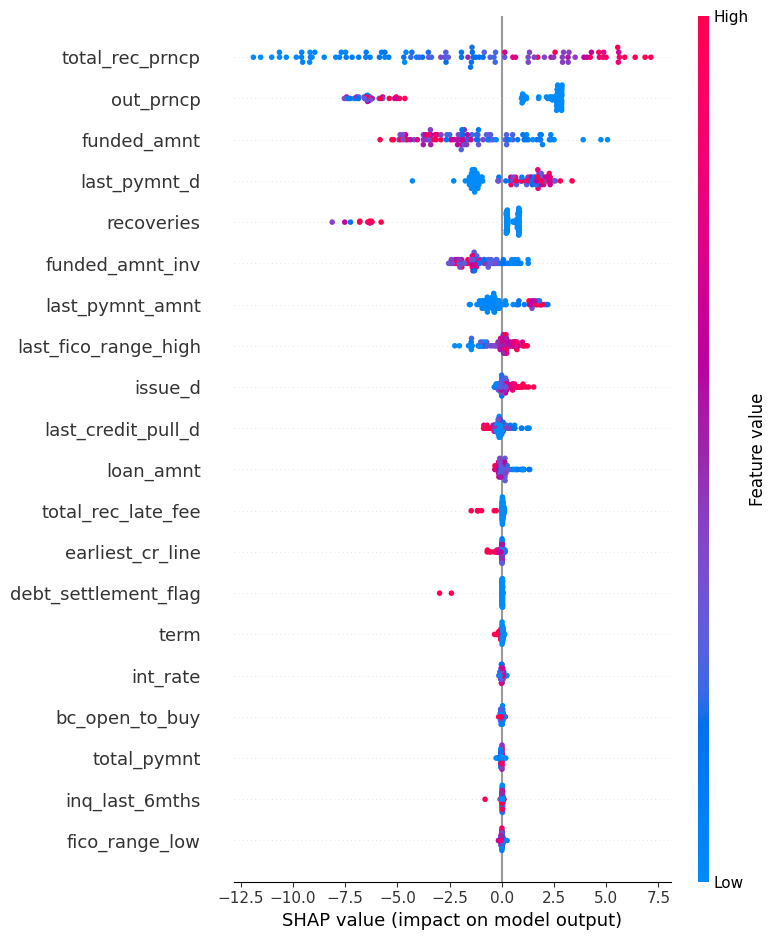

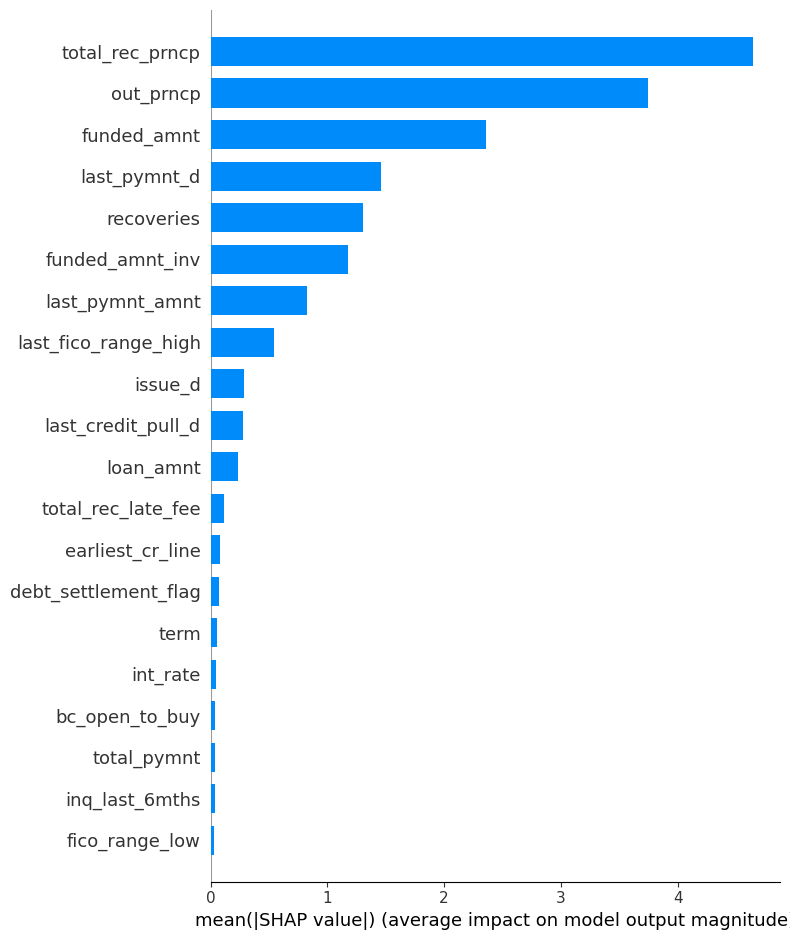

In [ ]:
import shap

explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test.iloc[:100])

# Summary plot for XGBoost
shap.summary_plot(shap_values_xgb, X_test.iloc[:100])
shap.summary_plot(shap_values_xgb, X_test.iloc[:100], plot_type="bar", color_bar=True, class_names=["Class 0", "Class 1"])

Permutation Feature Importance

Feature Importance (Permutation):
Feature: int_rate, Importance: -0.0000
Feature: bc_open_to_buy, Importance: -0.0000
Feature: pymnt_plan, Importance: 0.0000
Feature: fico_range_high, Importance: 0.0000
Feature: grade, Importance: 0.0000
Feature: collection_recovery_fee, Importance: 0.0000
Feature: application_type, Importance: 0.0000
Feature: last_fico_range_low, Importance: 0.0000
Feature: verification_status, Importance: 0.0000
Feature: sub_grade, Importance: 0.0000
Feature: total_bc_limit, Importance: 0.0000
Feature: total_rec_late_fee, Importance: 0.0001
Feature: fico_range_low, Importance: 0.0002
Feature: loan_amnt, Importance: 0.0003
Feature: earliest_cr_line, Importance: 0.0003
Feature: total_pymnt_inv, Importance: 0.0004
Feature: last_credit_pull_d, Importance: 0.0004
Feature: inq_last_6mths, Importance: 0.0005
Feature: total_pymnt, Importance: 0.0007
Feature: hardship_flag, Importance: 0.0010
Feature: last_fico_range_high, Importance: 0.0015
Feature: debt_settlement_flag, Imp

<ipython-input-11-720a661b946c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')


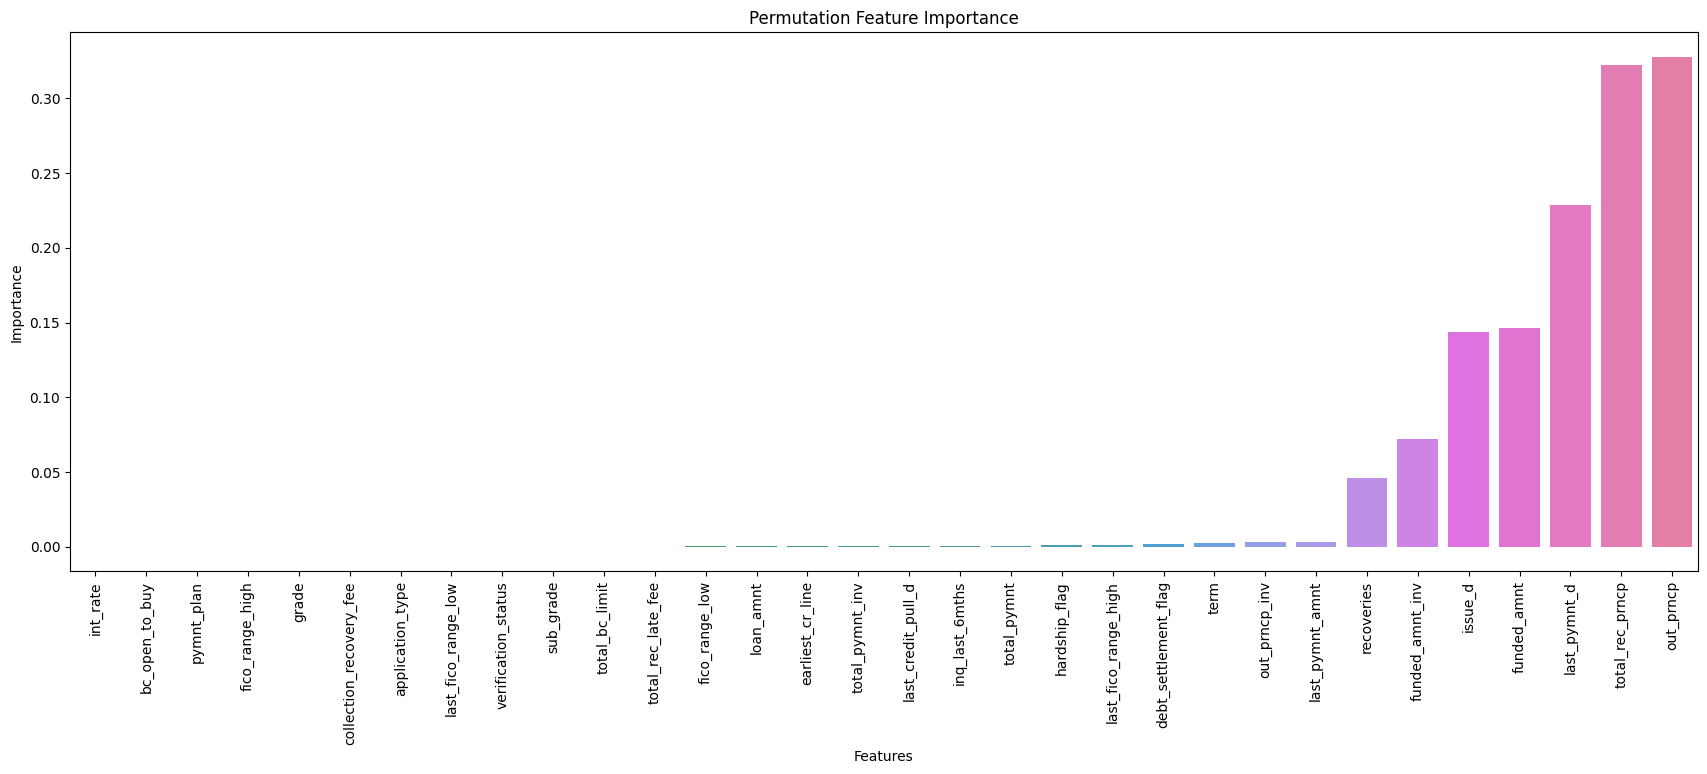

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns


xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Calculate permutation feature importance
result = permutation_importance(xgb_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get feature importance and sort them
sorted_idx = result.importances_mean.argsort()
feature_importance = pd.DataFrame({
    'Feature': X_test.columns[sorted_idx],
    'Importance': result.importances_mean[sorted_idx]
})

# Print all features with their importance
print("Feature Importance (Permutation):")
for index, row in feature_importance.iterrows():
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']:.4f}")

# Plot the feature importance
plt.figure(figsize=(21, 7))
sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=90)
plt.show()


<ipython-input-13-340bea20730b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')


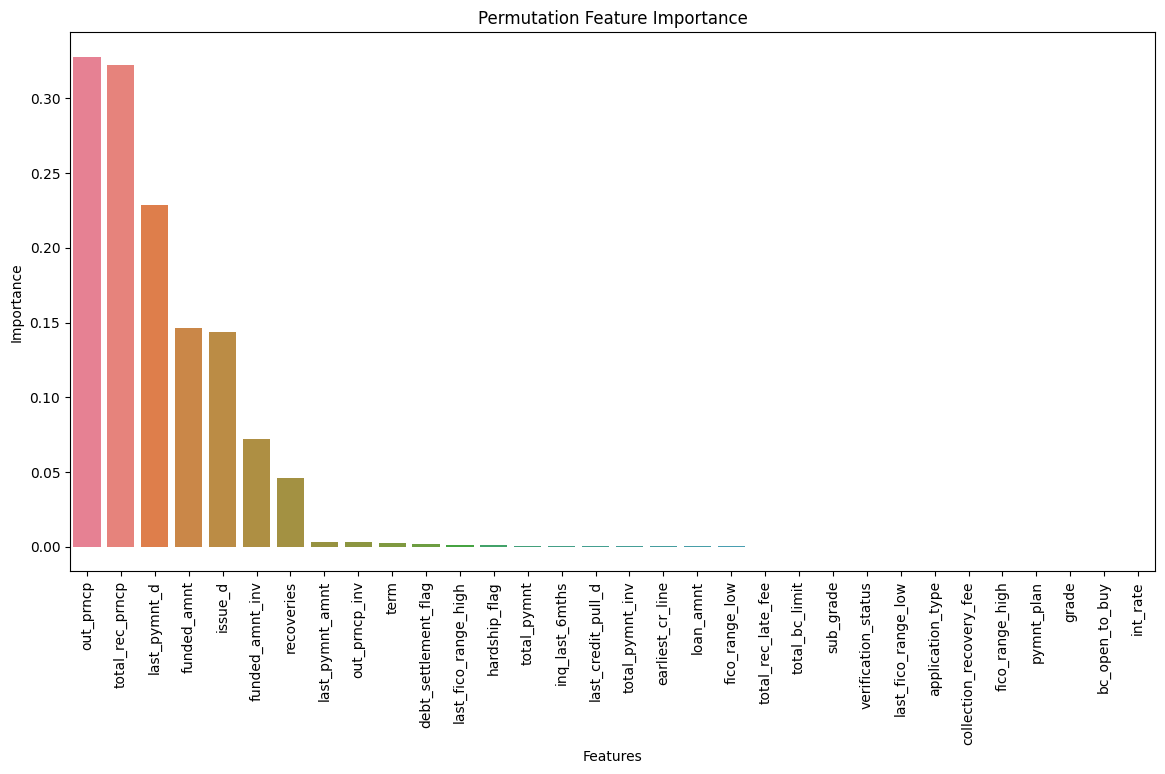

In [ ]:
# Plot the feature importance
# Sort the features based on their importance values
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(14, 7))
sns.barplot(x='Feature', y='Importance', data=feature_importance, palette='husl')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Feature Importance')
plt.xticks(rotation=90)
plt.show()